<a href="https://www.kaggle.com/code/ehiagwinachidinma/sentiment-analysis-of-amazon-product-reviews?scriptVersionId=166362435" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-analysis-4/Book1.csv
/kaggle/input/amazon-review/Amazon Product Review (1).txt
/kaggle/input/a-product-review/Amazon product review 3.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

plt.style.use('ggplot')

import nltk

In [3]:
# Read in data
import pandas as pd
file_path = '/kaggle/input/a-product-review/Amazon product review 3.csv'

df = pd.read_csv('/kaggle/input/a-product-review/Amazon product review 3.csv')

df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,31/08/2015,1
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,31/08/2015,0
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,31/08/2015,1
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,31/08/2015,1
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,31/08/2015,1


In [4]:
print(df.shape)
df = df.head(500)
print(df.shape)


(30846, 16)
(500, 16)


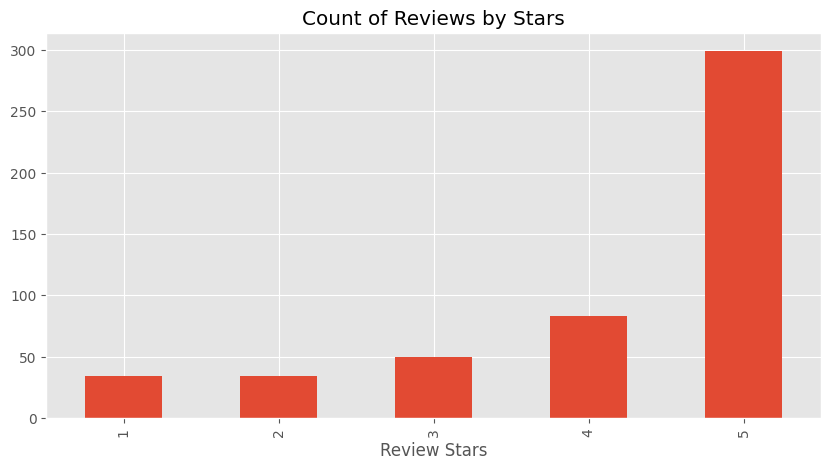

In [5]:
#QUICK EDA

ax = df['star_rating'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Stars', figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()


In [6]:
##Basic NLTK

In [7]:
example = df['review_body'][100]
print(example)

I love it but not user friendly.  I know the world likes going online for everything, I would prefer an owners manual and I would not mind paying extra for it.


In [8]:
nltk.word_tokenize(example)

['I',
 'love',
 'it',
 'but',
 'not',
 'user',
 'friendly',
 '.',
 'I',
 'know',
 'the',
 'world',
 'likes',
 'going',
 'online',
 'for',
 'everything',
 ',',
 'I',
 'would',
 'prefer',
 'an',
 'owners',
 'manual',
 'and',
 'I',
 'would',
 'not',
 'mind',
 'paying',
 'extra',
 'for',
 'it',
 '.']

In [9]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['I', 'love', 'it', 'but', 'not', 'user', 'friendly', '.', 'I', 'know']

In [10]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('love', 'VBP'),
 ('it', 'PRP'),
 ('but', 'CC'),
 ('not', 'RB'),
 ('user', 'RB'),
 ('friendly', 'JJ'),
 ('.', '.'),
 ('I', 'PRP'),
 ('know', 'VBP')]

In [11]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  love/VBP
  it/PRP
  but/CC
  not/RB
  user/RB
  friendly/JJ
  ./.
  I/PRP
  know/VBP
  the/DT
  world/NN
  likes/VBZ
  going/VBG
  online/VB
  for/IN
  everything/NN
  ,/,
  I/PRP
  would/MD
  prefer/VB
  an/DT
  owners/NNS
  manual/JJ
  and/CC
  I/PRP
  would/MD
  not/RB
  mind/VB
  paying/VBG
  extra/JJ
  for/IN
  it/PRP
  ./.)


In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer

# an instance of SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

scores = sia.polarity_scores('I love it')

# Print the scores
print(scores)

{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}


In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer

# An instance of SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

scores = sia.polarity_scores(example)

print(scores)

{'neg': 0.102, 'neu': 0.711, 'pos': 0.187, 'compound': 0.4325}


In [15]:
from tqdm import tqdm
from nltk.sentiment import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Run the polarity score for each text in the dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review_body']
    myid = row['customer_id']
    res[myid] = sia.polarity_scores(text)

100%|██████████| 500/500 [00:00<00:00, 1347.80it/s]


In [16]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'customer_id'})


In [17]:
vaders

,customer_id,neg,neu,pos,compound
0,11555559,0.000,0.108,0.892,0.8519
1,31469372,0.000,1.000,0.000,0.0000
2,26843895,0.055,0.783,0.162,0.9270
3,19844868,0.076,0.787,0.137,0.9118
4,1189852,0.000,0.805,0.195,0.1779
...,...,...,...,...,...
495,50186353,0.000,0.577,0.423,0.7650
496,13640575,0.000,0.751,0.249,0.8985
497,14896096,0.000,0.577,0.423,0.6588
498,5439056,0.093,0.907,0.000,-0.6019


In [18]:
vaders = vaders.merge(df, how='left', on='customer_id')

In [19]:
#now we have sentiment score and metadata
vaders

,customer_id,neg,neu,pos,compound,marketplace,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,11555559,0.000,0.108,0.892,0.8519,US,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,31/08/2015,1
1,31469372,0.000,1.000,0.000,0.0000,US,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,31/08/2015,0
2,26843895,0.055,0.783,0.162,0.9270,US,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,31/08/2015,1
3,19844868,0.076,0.787,0.137,0.9118,US,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,31/08/2015,1
4,1189852,0.000,0.805,0.195,0.1779,US,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,31/08/2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,50186353,0.000,0.577,0.423,0.7650,US,R1DQ7ESAH5Z8JI,B00LCHOCZY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,N,I love my kindle,"I love this kindle, I check my emails watch mo...",20/08/2015,1
496,13640575,0.000,0.751,0.249,0.8985,US,R3F6GBOL08A0HU,B00LCHS1FG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Love is my Kindle Fire.,It's the best!! I bring it with me on my comm...,20/08/2015,1
497,14896096,0.000,0.577,0.423,0.6588,US,R1KBU0LIQ9T0IE,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,N,Five Stars,Great buy! Still have a lot to learn,20/08/2015,1
498,5439056,0.093,0.907,0.000,-0.6019,US,R3LVC9R6D3EKQ1,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,2,0,0,N,N,One of those products that reminds you of the ...,One of those products that reminds you of the ...,20/08/2015,0


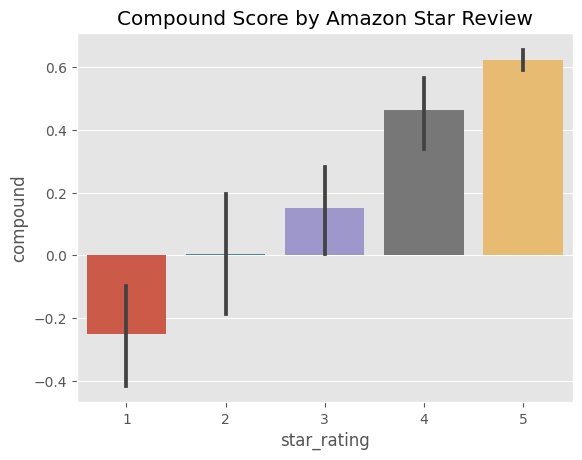

In [20]:
ax = sns.barplot(data=vaders, x='star_rating', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

<Axes: xlabel='star_rating', ylabel='pos'>

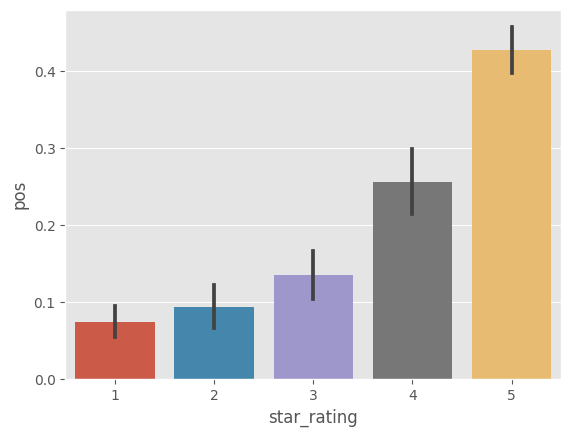

In [21]:
sns.barplot(data=vaders, x='star_rating', y='pos')

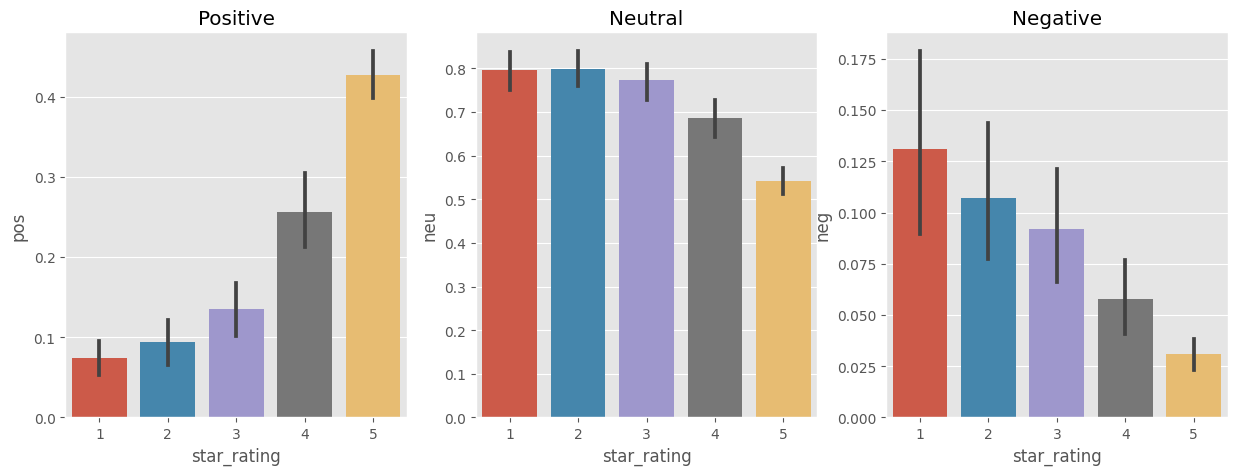

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(data=vaders, x='star_rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='star_rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='star_rating', y='neg', ax=axs[2])

axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

plt.show()

In [23]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [24]:
print(example)
sia.polarity_scores(example)

I love it but not user friendly.  I know the world likes going online for everything, I would prefer an owners manual and I would not mind paying extra for it.


{'neg': 0.102, 'neu': 0.711, 'pos': 0.187, 'compound': 0.4325}